In [122]:
import keras
import numpy as np
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline


#https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt   

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout

from keras.preprocessing.image import ImageDataGenerator

#### include top이 포함된 버전과 아닌것이 있다.

In [3]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')


#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')


#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')  

In [25]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet', include_top = False)

# inception은 target size가 다르다.
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top = False)


#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet', include_top = False)
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top = False)  

94773248/94765736 [==============================] - 14s 0us/step


C:\Users\Student\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 5s 0us/step


#### top =True 인 버전

In [4]:
vgg_model.summary()    # 138,357,544
#inception_model.summary() # 23,851,784
#resnet_model.summary()  # 25,636,712
#mobilenet_model.summary() # 4,253,864

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### top =False 인 버전 (뒷단은 custom해서 사용을 하겠다.)

In [27]:
vgg_model.summary()    # 138,357,544
#inception_model.summary() # 23,851,784
#resnet_model.summary()  # 25,636,712
#mobilenet_model.summary() # 4,253,864

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

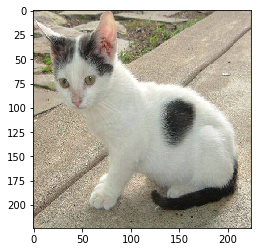

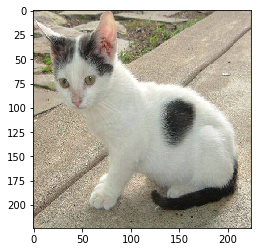

image batch size (1, 224, 224, 3)


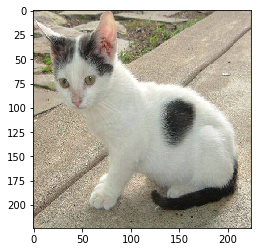

In [5]:
filename = 'cat.jpg'
# 224 x 224로 꼭 맞춰줘야 한다.
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()

# 1차원 데이터를 3차원으로?
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [8]:
# 모델마다 전처리 과정을 모두 갖는다.
processed_image = vgg16.preprocess_input(image_batch.copy())
print(processed_image.shape) # 모양이 달라지지는 않는다.
print(processed_image.dtype)
print(processed_image[0])

(1, 224, 224, 3)
float32
[[[ 42.060997   38.221      40.32     ]
  [ 46.060997   42.221      45.32     ]
  [ 26.060997   21.221      27.32     ]
  ...
  [ 61.060997   64.221      70.32     ]
  [ 53.060997   56.221      62.32     ]
  [ 51.060997   54.221      60.32     ]]

 [[  8.060997    6.2210007   7.3199997]
  [ 17.060997   14.221001   17.32     ]
  [ 19.060997   15.221001   21.32     ]
  ...
  [ 64.061      67.221      73.32     ]
  [ 51.060997   54.221      60.32     ]
  [ 49.060997   52.221      58.32     ]]

 [[ 54.060997   57.221      57.32     ]
  [ 62.060997   64.221      66.32     ]
  [ 59.060997   61.221      63.32     ]
  ...
  [ 62.060997   65.221      71.32     ]
  [ 57.060997   55.221      62.32     ]
  [ 55.060997   53.221      60.32     ]]

 ...

 [[ 26.060997   37.221      42.32     ]
  [ 42.060997   53.221      58.32     ]
  [ 27.060997   36.221      41.32     ]
  ...
  [ 78.061      81.221      80.32     ]
  [ 65.061      75.221      70.32     ]
  [ 96.061     106.

In [10]:
# 마지막 레이어까지 쭉 통과시켜라 마지막 레이어가 1000개 이기에 1000으로 나온다.
predictions = vgg_model.predict(processed_image)
print(predictions.shape)
# 여기서 최대값을 찾으면 된다.
print(predictions)

(1, 1000)
[[6.01668944e-06 1.32372925e-05 9.57598604e-05 6.77865974e-05
  2.45326839e-04 7.88022226e-05 1.48387571e-05 6.28513517e-05
  2.61552690e-04 5.89919637e-06 2.75582374e-06 7.29188969e-06
  8.97969187e-07 2.71786030e-05 1.95090183e-06 1.53719600e-06
  8.30569206e-06 1.63344215e-04 5.75682752e-05 2.25957374e-05
  2.15744672e-06 6.06209278e-06 2.20168076e-07 5.36908783e-06
  1.50730295e-06 2.45251158e-06 8.64706180e-06 2.21815230e-06
  6.42758778e-06 3.25337984e-04 1.44236071e-06 4.39508403e-06
  1.08465952e-06 2.74120794e-06 2.47698918e-05 5.96012251e-06
  1.10785395e-05 1.39255326e-05 2.41846301e-05 2.87771877e-06
  1.24568178e-05 1.18782409e-05 1.98898897e-06 5.88961029e-07
  4.44122707e-05 1.67023354e-05 5.01019240e-05 4.77140566e-06
  1.21784547e-06 1.03893217e-06 2.70272744e-06 6.47819979e-05
  9.55675350e-05 7.94386324e-06 9.50945105e-05 1.30701537e-05
  3.22508604e-05 1.37903471e-05 7.65562072e-06 9.62345075e-06
  7.09490268e-05 4.27155283e-06 1.27100921e-05 2.15520595e-0

In [11]:
# 정해진 레이블?의 인덱스를 찾아오는 것!? 정렬을 해서 확률값 가장 높은 10개만 가져와라
label_vgg = decode_predictions(predictions, top=10)
# 튜플로 값준다. (id, 이름, 인식한 확률값)
print(label_vgg)

[[('n02123597', 'Siamese_cat', 0.30934092), ('n01877812', 'wallaby', 0.08034114), ('n02326432', 'hare', 0.07509859), ('n02325366', 'wood_rabbit', 0.05053084), ('n03223299', 'doormat', 0.048173614), ('n02328150', 'Angora', 0.047498833), ('n02124075', 'Egyptian_cat', 0.043961193), ('n02108915', 'French_bulldog', 0.036655772), ('n02087046', 'toy_terrier', 0.015123311), ('n03793489', 'mouse', 0.011756651)]]


In [12]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02124075', 'Egyptian_cat', 0.15737608),
  ('n03958227', 'plastic_bag', 0.1436287),
  ('n03223299', 'doormat', 0.14099419)]]

In [13]:
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n03958227', 'plastic_bag', 0.1570368),
  ('n02124075', 'Egyptian_cat', 0.11697395),
  ('n02123597', 'Siamese_cat', 0.105327316),
  ('n02123045', 'tabby', 0.075648546),
  ('n02909870', 'bucket', 0.054681405)]]

In [22]:
filename = 'cats.jpg'
original = load_img(filename, target_size=(299, 299))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_inception = decode_predictions(predictions)
label_inception

[[('n02797295', 'barrow', 0.7896308),
  ('n02124075', 'Egyptian_cat', 0.044688974),
  ('n02123045', 'tabby', 0.020851377),
  ('n02442845', 'mink', 0.0090277055),
  ('n02909870', 'bucket', 0.008533271)]]

In [23]:
import cv2
img = cv2.imread("cats.jpg")
img = cv2.resize(img, (1000,1000))
# 이름 , 확률
cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.imwrite("out.jpg", img)

True

In [24]:
# 섞여있는 고야이 안됨
# 박스쳐서 줘야한다. 인식!!
# detection은 어디 있는지도 찾아야
# segmetation은 고양이 외곽도 따야한다.

In [ ]:
# 폴더에는 서브 폴대를 가져야 한다.(클래스가 하나 초과여야 한다.)

### inception_net을 제외하고 자기 폴더로 실습해보기

In [28]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')


#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')


#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')  

In [85]:
batch_size = 256

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        'myimage/train/', 
        target_size=(224, 224), 
        batch_size=batch_size,
        class_mode='categorical') 

image_gen = ImageDataGenerator(rescale=1./255)


Found 22 images belonging to 2 classes.


In [134]:
# 이미지를 배치 단위로 불러와 줄 generator입니다.
test_datagen = ImageDataGenerator()

test_generator = train_datagen.flow_from_directory(
        'myimage/train/', 
        target_size=(224, 224), 
        batch_size=22,
        class_mode='binary', shuffle=False) 

X, _ = test_generator.next()

Found 22 images belonging to 2 classes.


In [130]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
        'myimage/train/',
        target_size=(224, 224),    
        batch_size=22,
        class_mode='binary', shuffle=False)

X, _ =  test_generator.next()

Found 22 images belonging to 2 classes.


In [112]:
decode_vgg = decode_predictions(
    vgg_model.predict(
        vgg16.preprocess_input(X.copy())), top=3)

decode_resnet = decode_predictions(
    resnet_model.predict(
        resnet50.preprocess_input(X.copy())), top=3)

decode_mobilenet = decode_predictions(
    mobilenet_model.predict(
        mobilenet.preprocess_input(X.copy())), top=3)

In [135]:
decode_vgg = decode_predictions(
    vgg_model.predict(
        vgg16.preprocess_input(X.copy())), top=3)

decode_resnet = decode_predictions(
    resnet_model.predict(
        resnet50.preprocess_input(X.copy())), top=3)  

decode_mobilenet = decode_predictions(
    mobilenet_model.predict(
        mobilenet.preprocess_input(X.copy())), top=3)

In [ ]:
X2 = vgg16.preprocess_input(X.copy())

X[0]
plt.imshow(X[0]/255)
plt.show()
## vggnet의 자체 전처리 무언가에 의해 변형되었다.
plt.imshow(X2[0]/255)
plt.show()

print(X2[0])
print(X[0])

In [136]:
print(X.shape[0])

22


In [137]:
print(decode_vgg)

[[('n03729826', 'matchstick', 0.07576301), ('n01930112', 'nematode', 0.048045807), ('n03666591', 'lighter', 0.030498382)], [('n03729826', 'matchstick', 0.07618407), ('n01930112', 'nematode', 0.04845499), ('n03666591', 'lighter', 0.03066614)], [('n03729826', 'matchstick', 0.076197), ('n01930112', 'nematode', 0.04841385), ('n03666591', 'lighter', 0.030661812)], [('n03729826', 'matchstick', 0.07595495), ('n01930112', 'nematode', 0.049452625), ('n03666591', 'lighter', 0.031239327)], [('n03729826', 'matchstick', 0.07565459), ('n01930112', 'nematode', 0.047932938), ('n03666591', 'lighter', 0.030720817)], [('n03729826', 'matchstick', 0.07601747), ('n01930112', 'nematode', 0.048068073), ('n03666591', 'lighter', 0.03072429)], [('n03729826', 'matchstick', 0.077542365), ('n01930112', 'nematode', 0.048066605), ('n03666591', 'lighter', 0.031445503)], [('n03729826', 'matchstick', 0.07597192), ('n01930112', 'nematode', 0.0484811), ('n03666591', 'lighter', 0.030772232)], [('n03729826', 'matchstick', 0

In [109]:
for i in range(X.shape[0]):
    img = cv2.resize(X[i]*255, (1000,1000))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)    
    cv2.putText(img, f"VGG16: {decode_vgg[i][0][1]}", (350,45),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(img, f"resnet: {decode_resnet[i][0][1]}", (350,90),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(img, f"mobilenet: {decode_mobilenet[i][0][1]}", (350,135),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.imwrite(f"out{i}.jpg", img)

다양한 범위의(-29~300)데이터를 0에서 1사이로 만들고 255로 스케일링해주는것 아주중요!
그냥 무조건 0-255로 하는게 아주아주 중요!

In [103]:
import os
#print(train_generator[0][0][:][:])
print(len(os.listdir("myimage/train/cat/")))

# 첫번째 이미지
filename = train_generator[0][0][0][:]
numpy_image = img_to_array(original)
original = load_img(filename, target_size=(224, 224))
#for i in range(os.listdir("myimage/train/cat/")):
    

11


AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [30]:
import cv2
img = cv2.imread("cats.jpg")
img = cv2.resize(img, (1000,1000))
# 이름 , 확률
cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.imwrite("out.jpg", img)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [11]:
for i in range(5):
    print('../dataset/hard_handwriting_shape/train/circle/circle{0:05d}.png{1:05d}'.format(i+1),format(i+10))        


IndexError: tuple index out of range